In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [103]:
#Load complete data@ and converting the date as index
energy_dat = pd.read_csv("E:/ADS/Case Study/casestudy/energydata_complete.csv", parse_dates= ['date'], index_col= 'date')

# Data Clean:
The data is clean and need no cleaning as shown by the below information.

In [104]:
#All columns are non null and datetime as index
energy_dat.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 non

In [105]:
#Describe
energy_dat.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


# Data Transformation
Add the columns many of columns such as 
week of day - Sunday, Monday, Tuesday, Wednesday, Thursday, Friday, Saturday to denote the day of the week
week status - with attributes such as weekends, weekdays to signify the day is weekends or weekdays.
NSM - to denote the number of seconds from the midnight of a day

In [106]:

#Add the week day columns 
energy_dat["week_of_day"] = energy_dat.index.to_series().apply(lambda x: x.dayofweek)
#Create a dictionary of the name of days
days = {0:'Sunday', 1:'Monday', 2:'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
energy_dat1= energy_dat.replace({"week_of_day": days}) 
#Creating week status
day_split = { "weekdays" : ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], "weekends" :['Saturday', 'Sunday']}
d = {k: oldk for oldk, oldv in day_split.items() for k in oldv}
energy_dat1["week_status"] = energy_dat1["week_of_day"].map(d)

In [107]:
# Creating NSM (number of seconds from midnight)
energy_dat1["NSM"] = energy_dat1.index.to_series().apply(lambda x:x.hour*3600 + x.minute*60 +x.second)

In [108]:
#Time as index , total 31 columns and 19735 rows 
energy_dat1.shape

(19735, 31)

In [109]:
#Applicances consumption on an monthly basis

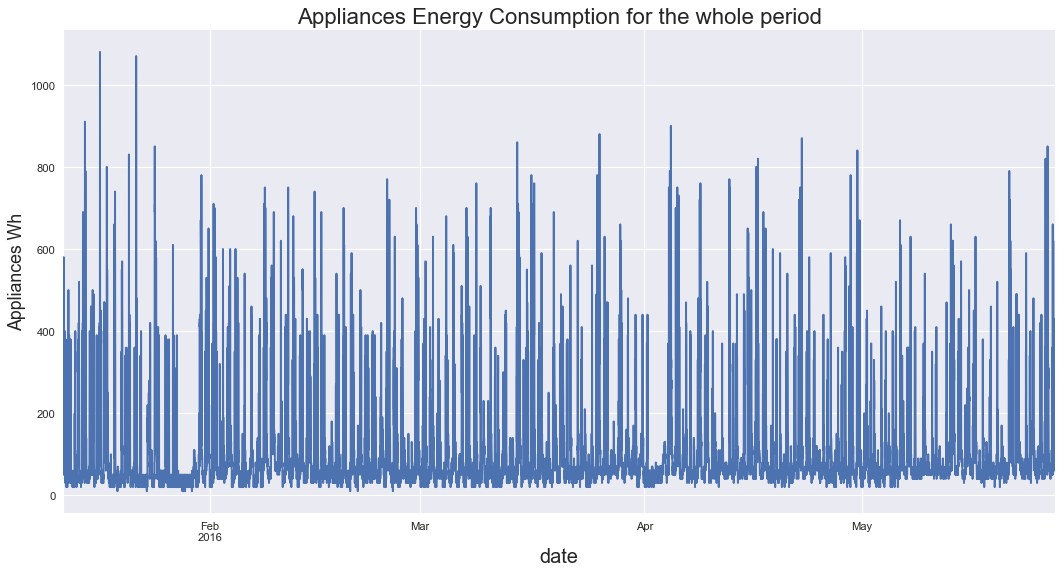

In [13]:
# plot_app = energy_dat1["Appliances"].plot(title = "Appliances Energy Consumption for the whole period", xtick = "Applicances Wh", ytick = "Time")

# plt.show()
# fig, ax = plt.subplot()
plt.figure(figsize = (16,8), dpi = 80, facecolor = 'w', edgecolor = 'k', num = None)
plt.title('Appliances Energy Consumption for the whole period', fontsize=20)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Appliances Wh', fontsize=16)
# ax.set_xlim([datetime.date(2016, 1, 1), datetime.date(2016, 5, 30)])
# ax.set_ylim([0, 1500])
# fig.savefig('test.jpg')
energy_dat1["Appliances"].plot()
plt.show()

In [110]:
# Geeting first week data:
appl = energy_dat1['2016-1-11': '2016-1-18']

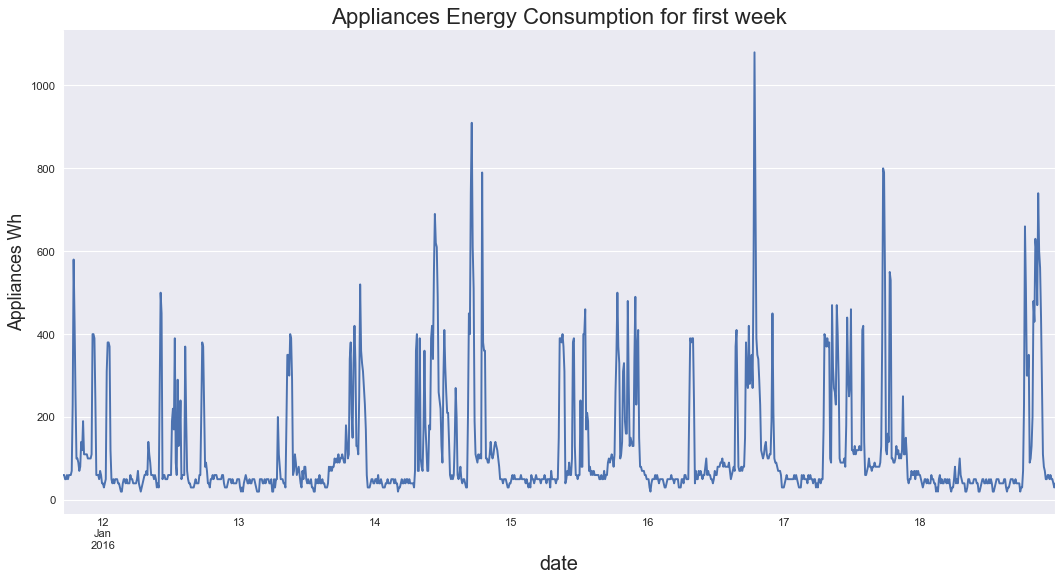

In [25]:
plt.figure(figsize = (16,8), dpi =80, facecolor = 'w', edgecolor = 'k', num = None)
plt.title('Appliances Energy Consumption for first week', fontsize=20)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Appliances Wh', fontsize=16)
appl["Appliances"].plot(kind = 'line')
plt.show()

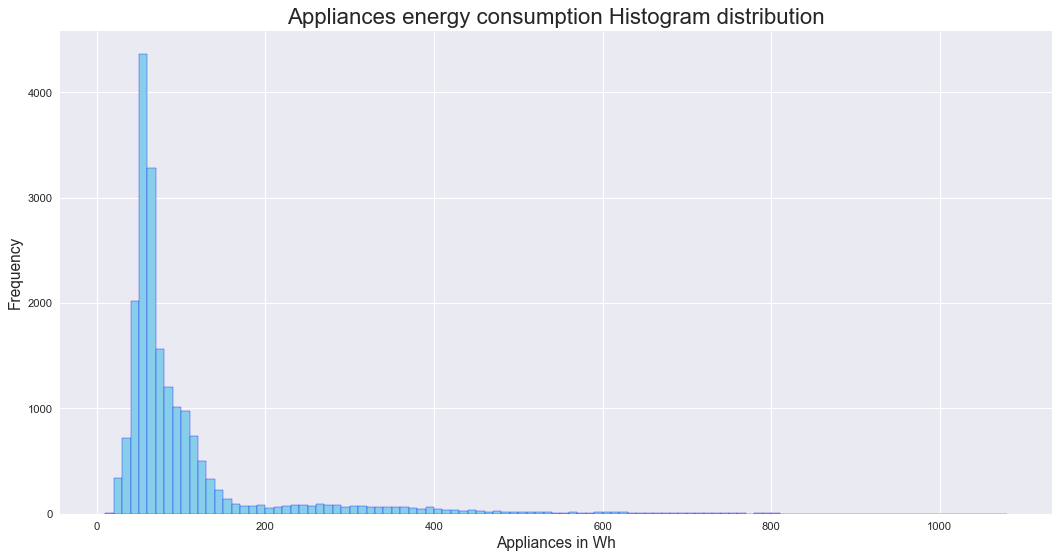

In [16]:
#Frequency plots for Appliances usage:
plt.figure(figsize = (16,8), dpi =80, facecolor = 'w', edgecolor = 'b', num = None)
plt.title("Appliances energy consumption Histogram distribution", fontsize = 20)
plt.xlabel('Appliances in Wh', fontsize = 14)
plt.ylabel('frequency', fontsize = 14)
energy_dat1["Appliances"].plot(kind = "hist", bins = np.arange(min(energy_dat["Appliances"]) , max(energy_dat["Appliances"]) + 10, 10), edgecolor = 'b', facecolor ='skyblue')
plt.show()

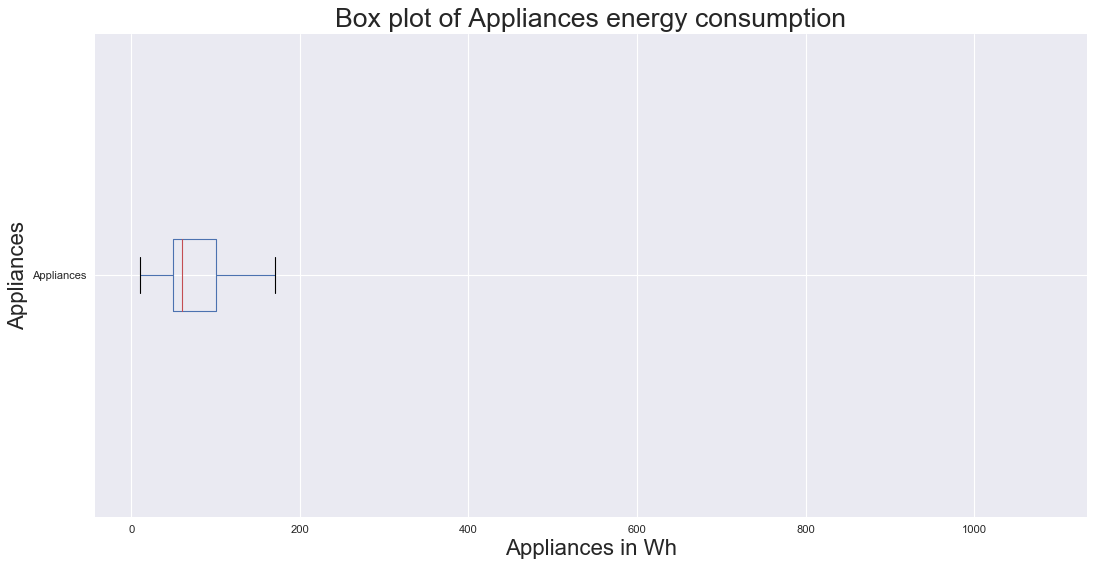

In [50]:
# Boxplot
plt.figure(figsize= (16,8), dpi = 80, edgecolor= 'w', facecolor = 'w', num= None)
plt.title("Box plot of Appliances energy consumption", fontsize= 24)
plt.ylabel("Appliances", fontsize= 20)
plt.xlabel("Appliances in Wh", fontsize=20)
energy_dat["Appliances"].plot(kind = 'box', vert = False)
plt.show()

In [19]:
energy_dat1["week"] = energy_dat1.index.week

In [ ]:
#Correlation diagram

# Features significance are measured by Correlation of Appliances with other variables:
1. Plot shows highest correlation between outdoor temperature  and Appliances energy consumption.
2. Negative correlation exists between Appliances and outdoor humidity RH6.
3. Positive correlations between the consumption of appliances and T7, T8 and T9 being 0.03, 0.05 and 0.02 respectively.
4. Highest correlation between the energy consumption of appliances and NSM with a value of 0.22. 
5. The correlation diag. shows the relationship of the energy consumption of various components of the house recorded over a period of six months. 
6. The plot show the positive correlation between energy consumption of lights and Appliances.
7. Positive correlation is high i.e. 0.19 between indoor Temperature  (T2) and Appliances energy consumption.
8. Positive correlation is expected between T1 and T3.
9. Plot shows highest correlation between outdoor temperature  and Appliances energy consumption.
10. Negative correlation exists between Appliances and outdoor humidity RH6.
11. positive correlations between the consumption of appliances and T7, T8 and T9 being 0.03, 0.05 and 0.02 respectively.
12. Highest correlation between the energy consumption of appliances and NSM with a value of 0.22. 

In [58]:
corr_num = energy_dat1[['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3']].corr()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3
Appliances,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292
lights,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161
T1,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550
RH_1,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677
T2,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497
RH_2,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326
T3,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234
RH_3,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000


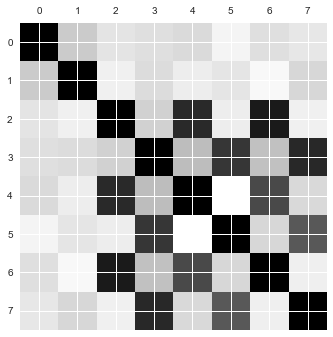

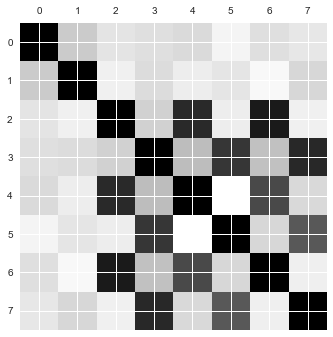

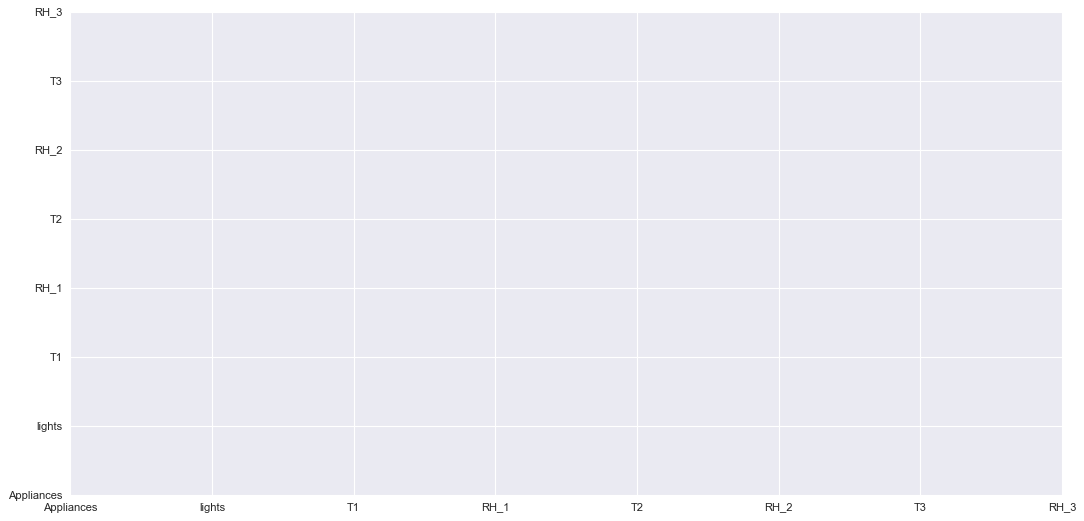

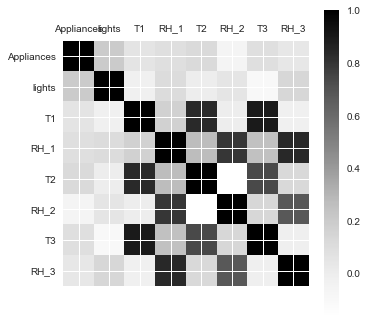

In [79]:
var_t = energy_dat1[['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3']]
plt.matshow(var_t.corr())
# plt.figure(figsize= (16,8), dpi = 80, edgecolor= 'w', facecolor = 'w', num= None)
plt.xticks(range(len(var_t.columns)), var_t.columns)
plt.yticks(range(len(var_t.columns)), var_t.columns)
plt.colorbar()
plt.show()

C:\Users\Girijesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


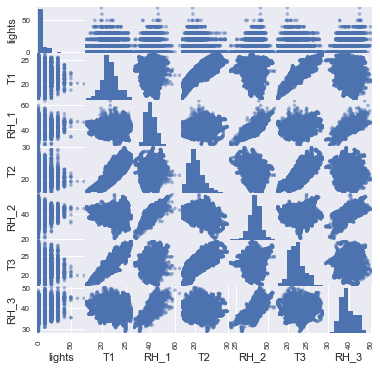

In [52]:
pd.scatter_matrix(var_t, figsize= (6,6))
plt.show()

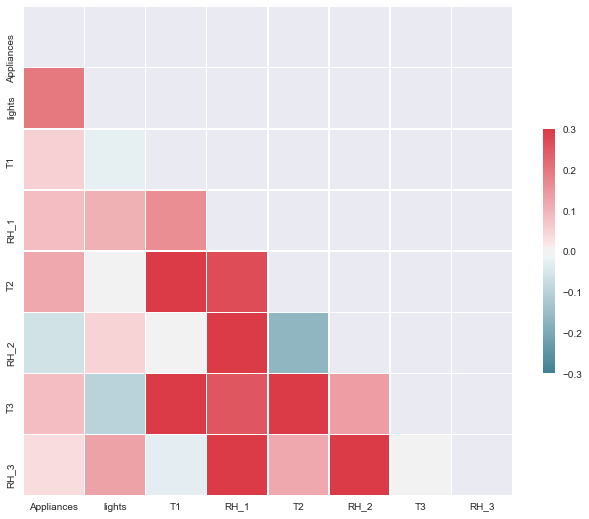

In [60]:
#Correaltion plot
corr = var_t.corr()
#Crating a mask for upper triancgular matrix
mask = np.zeros_like(corr, dtype =np.bool)
mask[np.triu_indices_from(mask)] = True

#Figure size for the plot
f, ax = plt.subplots(figsize=(11, 9))

# Generate custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Create a Heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

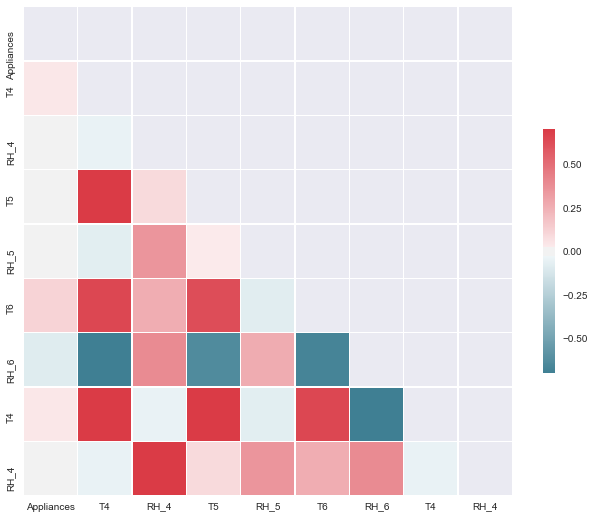

In [73]:
#Correaltion plot
var_t = energy_dat1[['Appliances', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6',  'T4',  'RH_4']]
corr_1 = var_t.corr()
#Crating a mask for upper triancgular matrix
mask = np.zeros_like(corr_1, dtype =np.bool)
mask[np.triu_indices_from(mask)] = True

#Figure size for the plot
f, ax = plt.subplots(figsize=(11, 9))

# Generate custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Create a Heatmap
sns.heatmap(corr_1, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

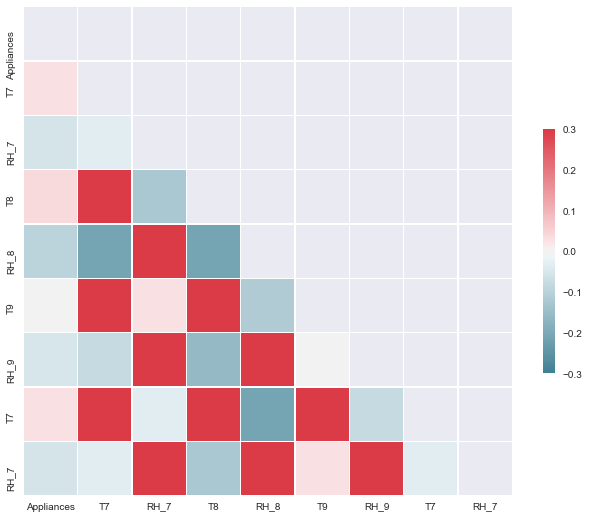

In [74]:
var_t = energy_dat1[['Appliances', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T7', 'RH_7'  ]]
corr_1 = var_t.corr()
#Crating a mask for upper triancgular matrix
mask = np.zeros_like(corr_1, dtype =np.bool)
mask[np.triu_indices_from(mask)] = True

#Figure size for the plot
f, ax = plt.subplots(figsize=(11, 9))

# Generate custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Create a Heatmap
sns.heatmap(corr_1, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

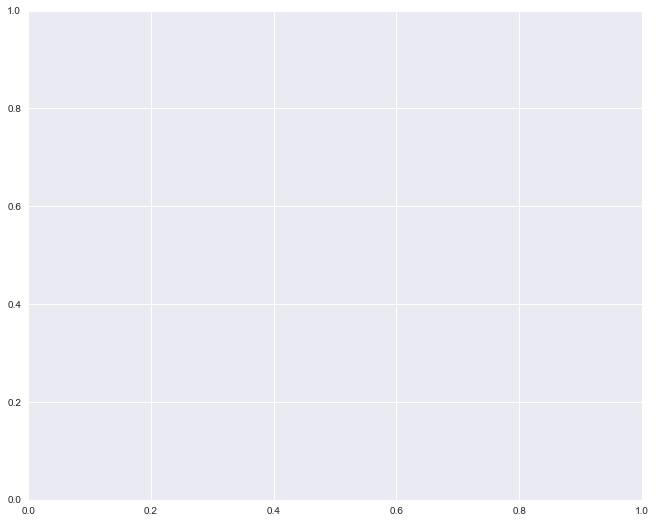

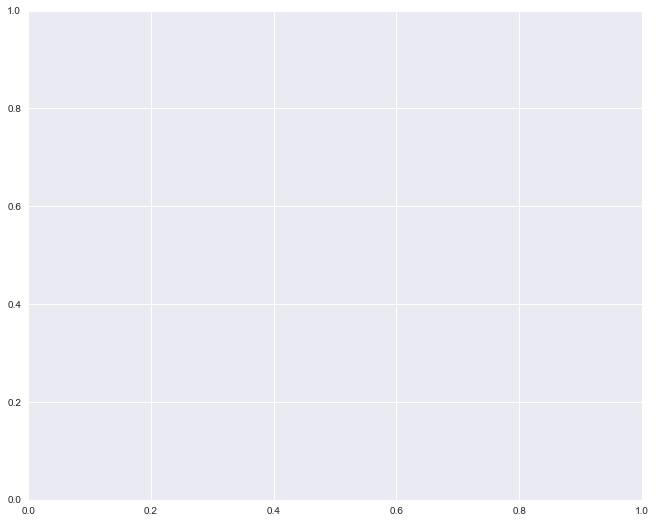

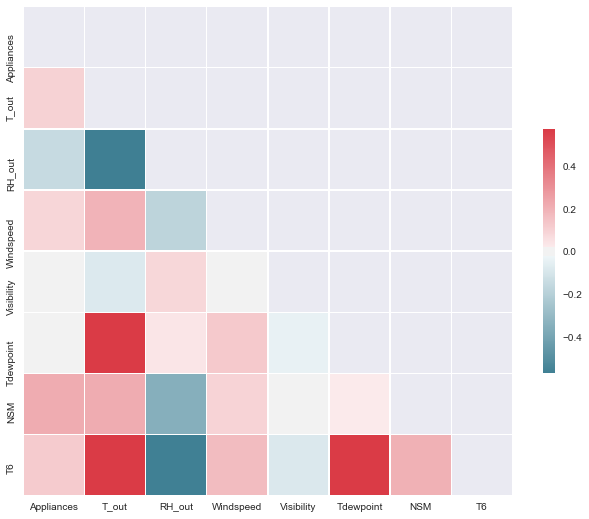

In [70]:
#Correaltion plot
var_t = energy_dat1[['Appliances', 'T_out', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'NSM', 'T6']]
corr_1 = var_t.corr()
#Crating a mask for upper triancgular matrix
mask = np.zeros_like(corr_1, dtype =np.bool)
mask[np.triu_indices_from(mask)] = True

#Figure size for the plot
f, ax = plt.subplots(figsize=(11, 9))

# Generate custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Create a Heatmap
sns.heatmap(corr_1, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

# Preprocessing is required as the data is measured with different scales:

In [91]:
energy_dat_p = energy_dat1.iloc[:,:28]

In [130]:
from sklearn import preprocessing

minmax_scalar = preprocessing.MinMaxScaler()
np_dat = minmax_scalar.fit_transform(energy_dat_p)
df_normalized = pd.DataFrame(np_dat)

In [112]:
names = energy_dat.iloc[:,:28].columns

In [114]:
# Add the column names for the normalized dataframe
df_normalized.columns = names

In [117]:
#Add the index for the normalized dataframes
df_normalized.index =  energy_dat.iloc[:,:28].index

In [127]:
rem_col = energy_dat1[['week_of_day', 'week_status', 'NSM']]

pandas.core.frame.DataFrame

In [129]:
#Normalized DataFrame
norm_df = pd.merge(df_normalized, rem_col, left_index=True, right_index=True, how= 'outer')